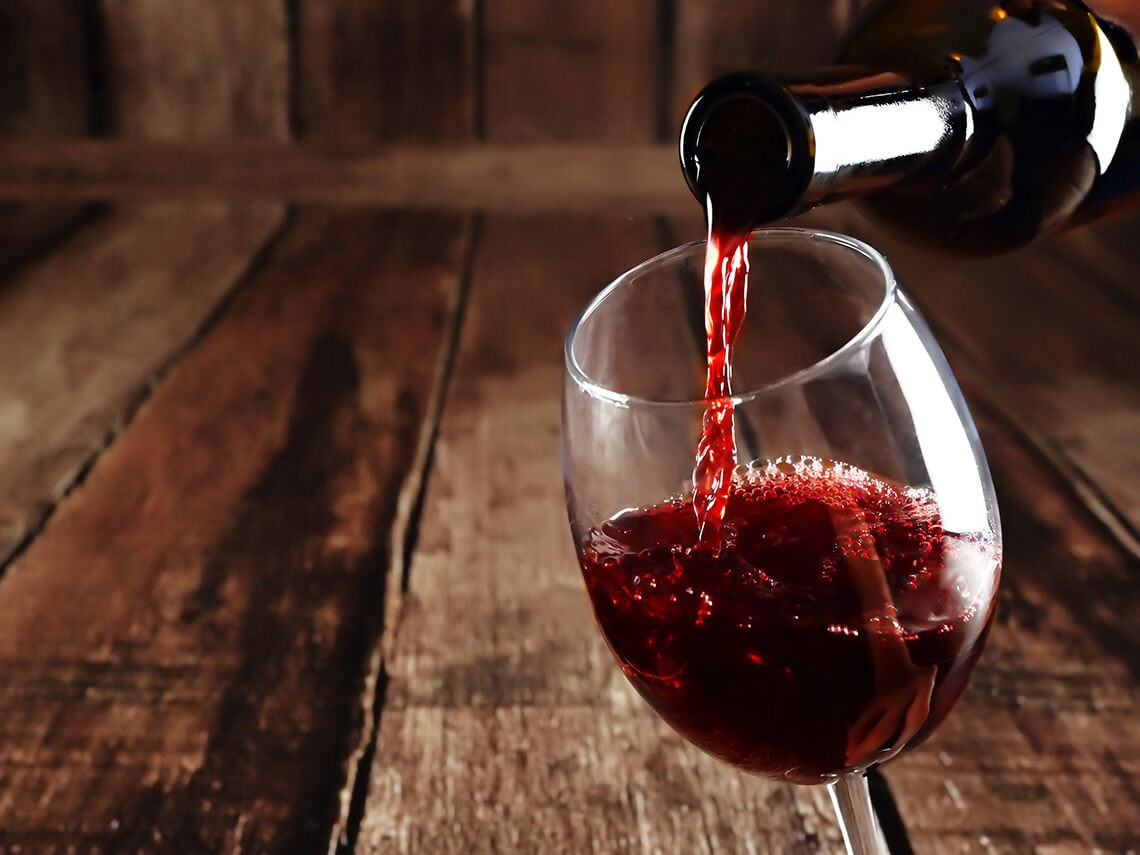

# 1.Problem Framing

These data are the results of a chemical analysis of wines grown in the some region in Italy but derived from three different cultivators. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

It is a supervised Classification Problem with target variable as 'Wine' column having 3 classes of wine.


The Wine is calssified on the basis of consitutents ,mentioned as independent variable and we will build a model which will help us to classify the Wine on tthe basis of consitutents

# 2.Importing Librairies and  Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
wine=pd.read_csv(r'C:\Users\esvit\Downloads\Downloads\data science\data\wine.csv')
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.shape

(178, 14)

In [4]:
wine.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# 3.EDA 

3.1 Data Cleaning

In [6]:
#checking Duplicacy
wine.duplicated().sum()

0

In [7]:
#checking format
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
#checking null values
wine.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [9]:
wine.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


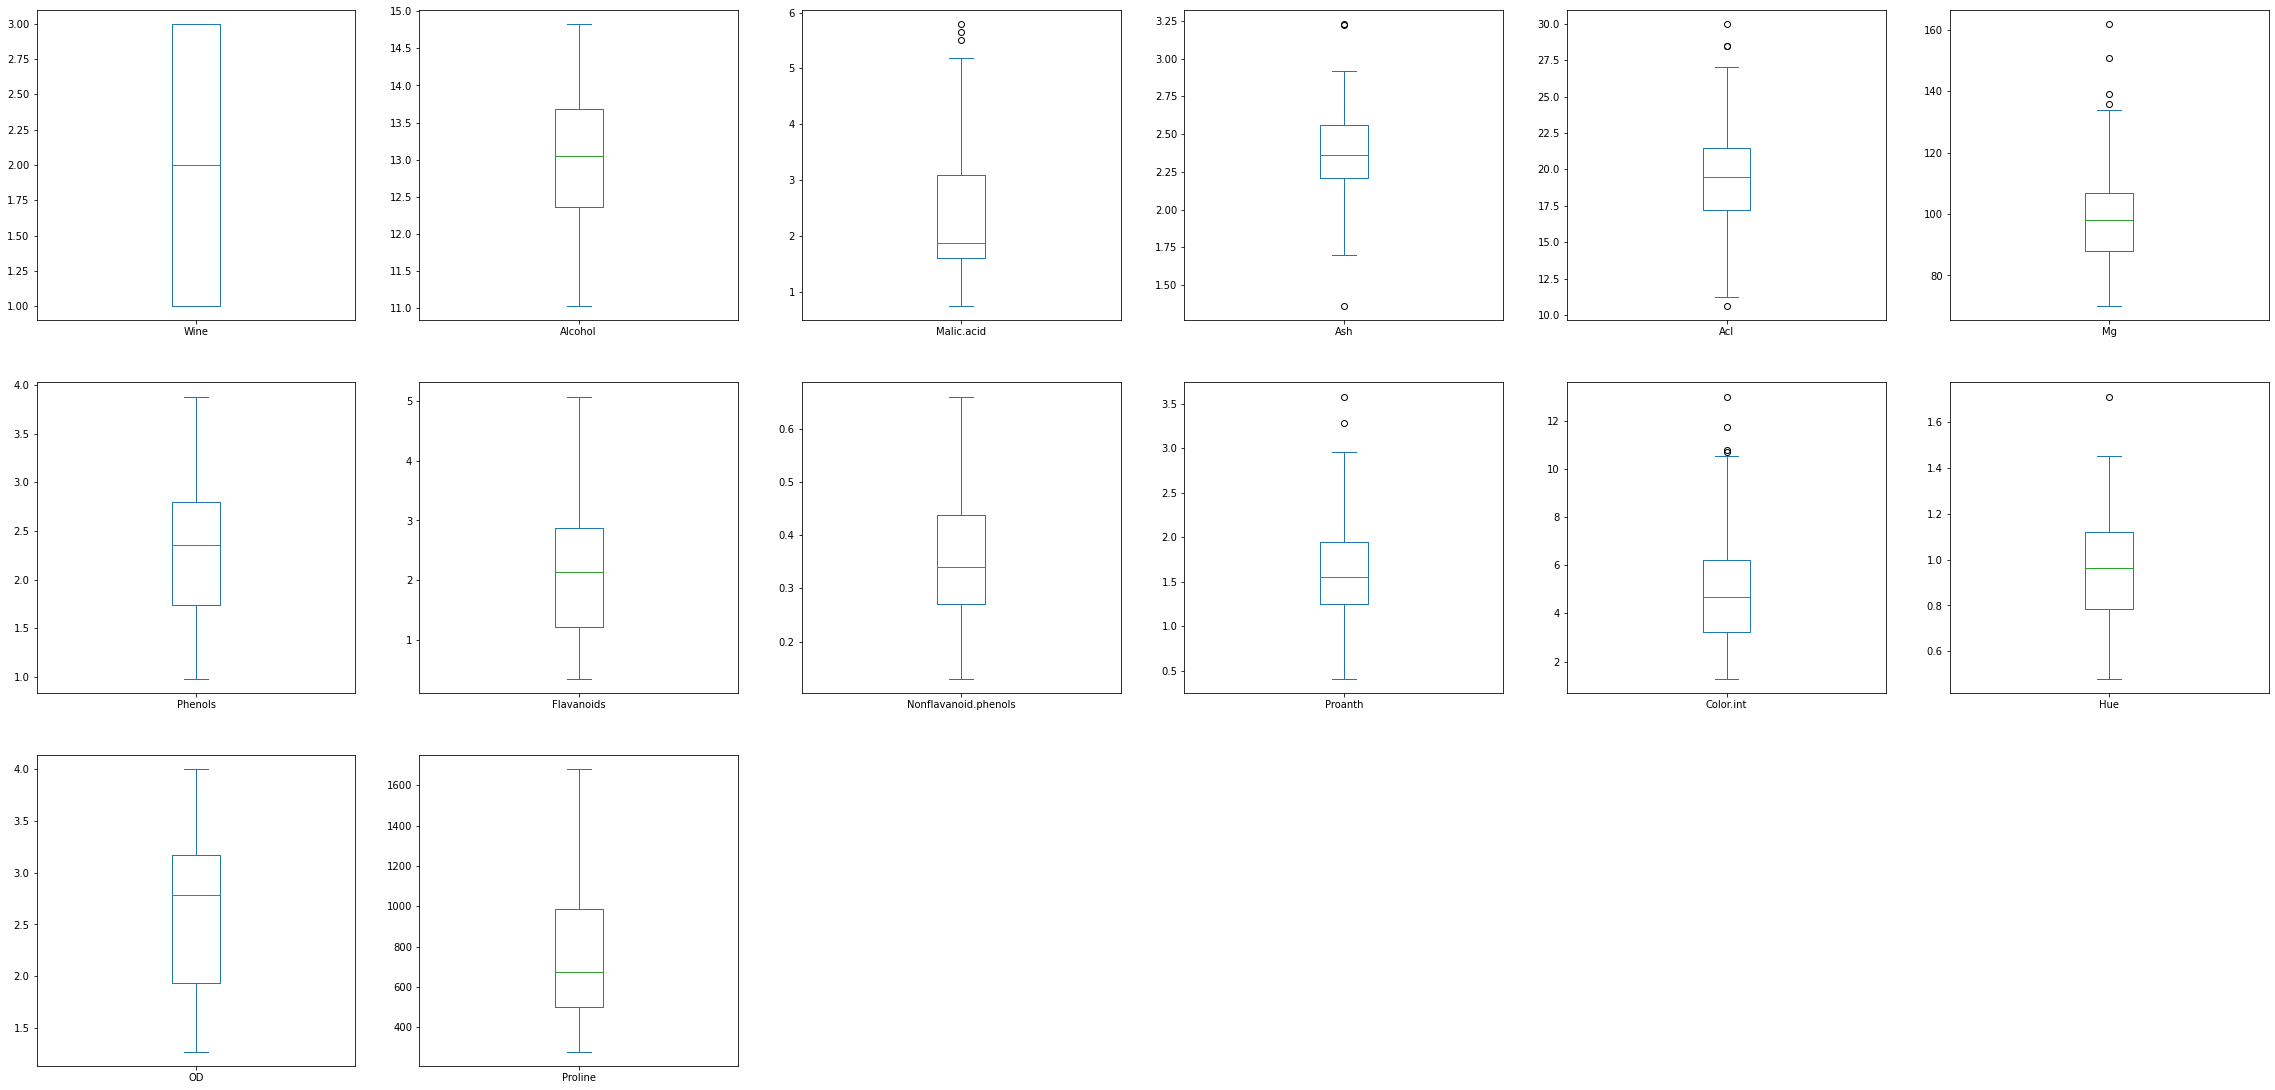

In [10]:
wine.plot(kind='box',subplots=True,figsize=(40,40),layout=(6,6))
plt.show()

In [11]:
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
col=list(wine.columns)
col

['Wine',
 'Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']

In [13]:
col.remove('Wine')
col

['Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']

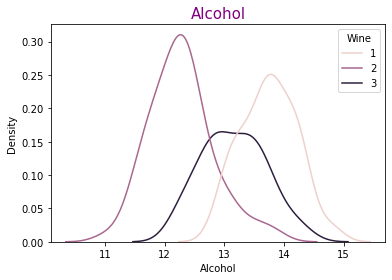

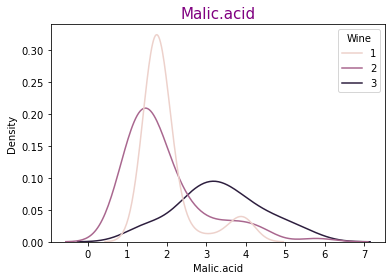

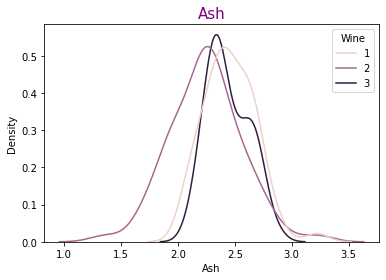

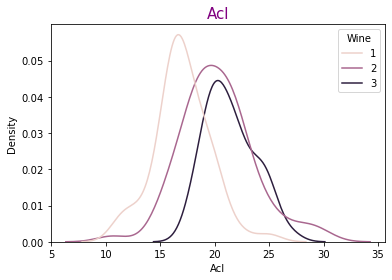

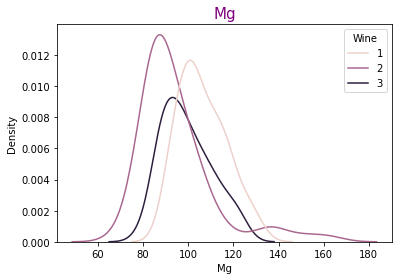

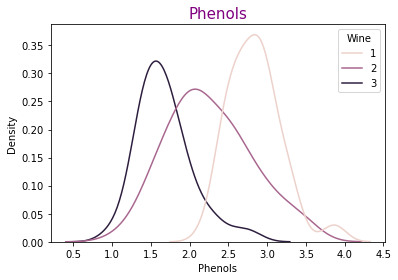

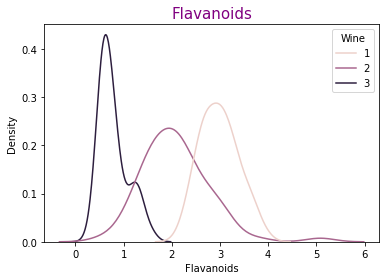

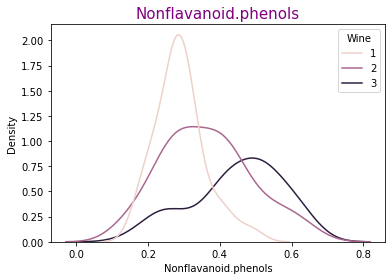

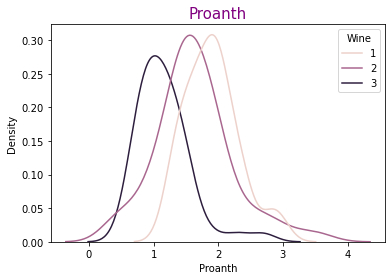

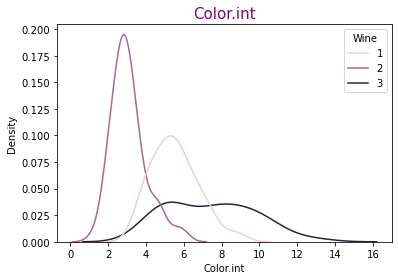

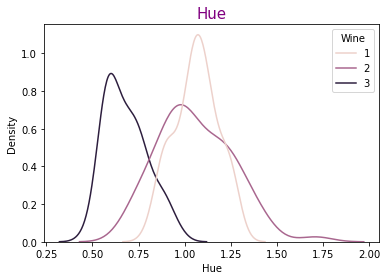

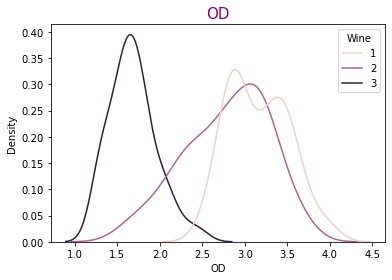

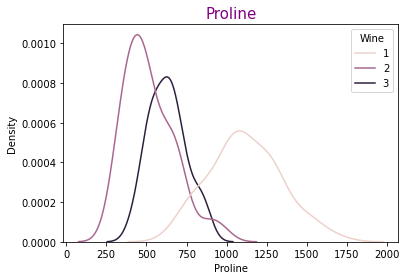

In [14]:
for i in col:
    sns.kdeplot(wine[i],hue=wine['Wine'])
    plt.title(i,fontsize=15,color='purple')
    plt.show()

# 4.Data Processing

Removing outliers

In [15]:
Q1=wine.quantile(0.25)
Q3=wine.quantile(0.75)
IQR=Q3-Q1
IQR

Wine                      2.0000
Alcohol                   1.3150
Malic.acid                1.4800
Ash                       0.3475
Acl                       4.3000
Mg                       19.0000
Phenols                   1.0575
Flavanoids                1.6700
Nonflavanoid.phenols      0.1675
Proanth                   0.7000
Color.int                 2.9800
Hue                       0.3375
OD                        1.2325
Proline                 484.5000
dtype: float64

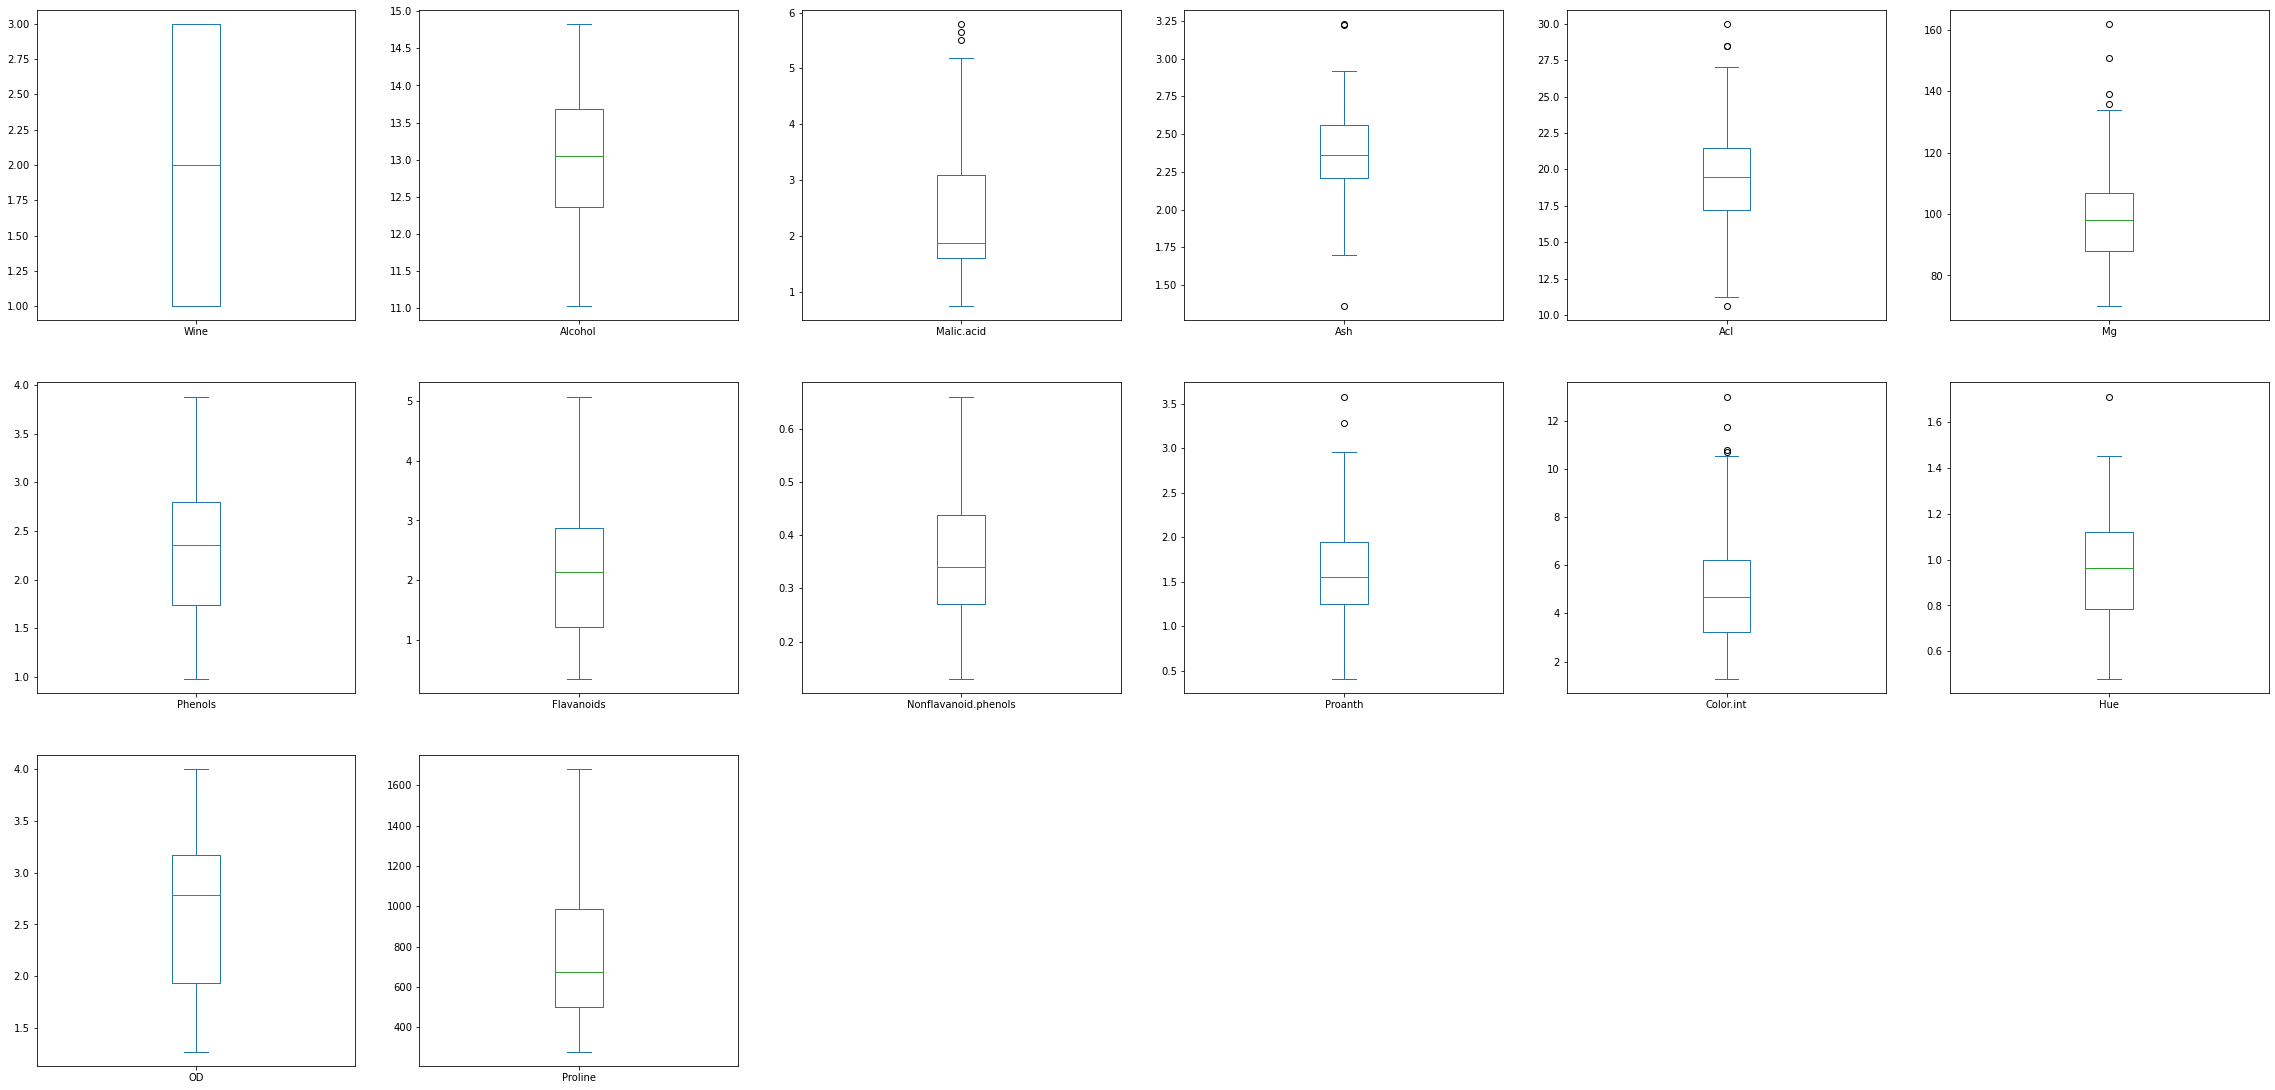

In [16]:
wine.plot(kind='box',subplots=True,figsize=(40,40),layout=(6,6))
plt.show()

Removing outlier from those column where we can detect there are outliers

In [17]:
col

['Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']

In [18]:
feature=['Malic.acid','Ash','Acl','Mg','Proanth','Color.int','Hue']
feature

['Malic.acid', 'Ash', 'Acl', 'Mg', 'Proanth', 'Color.int', 'Hue']

In [19]:
for i in feature:
    Q1=wine[i].quantile(0.25)
    Q3=wine[i].quantile(0.75)
    IQR=Q3-Q1
    wine=wine[(wine[i]>=Q1-1.5*IQR) & (wine[i]<=Q3+1.5*IQR)]

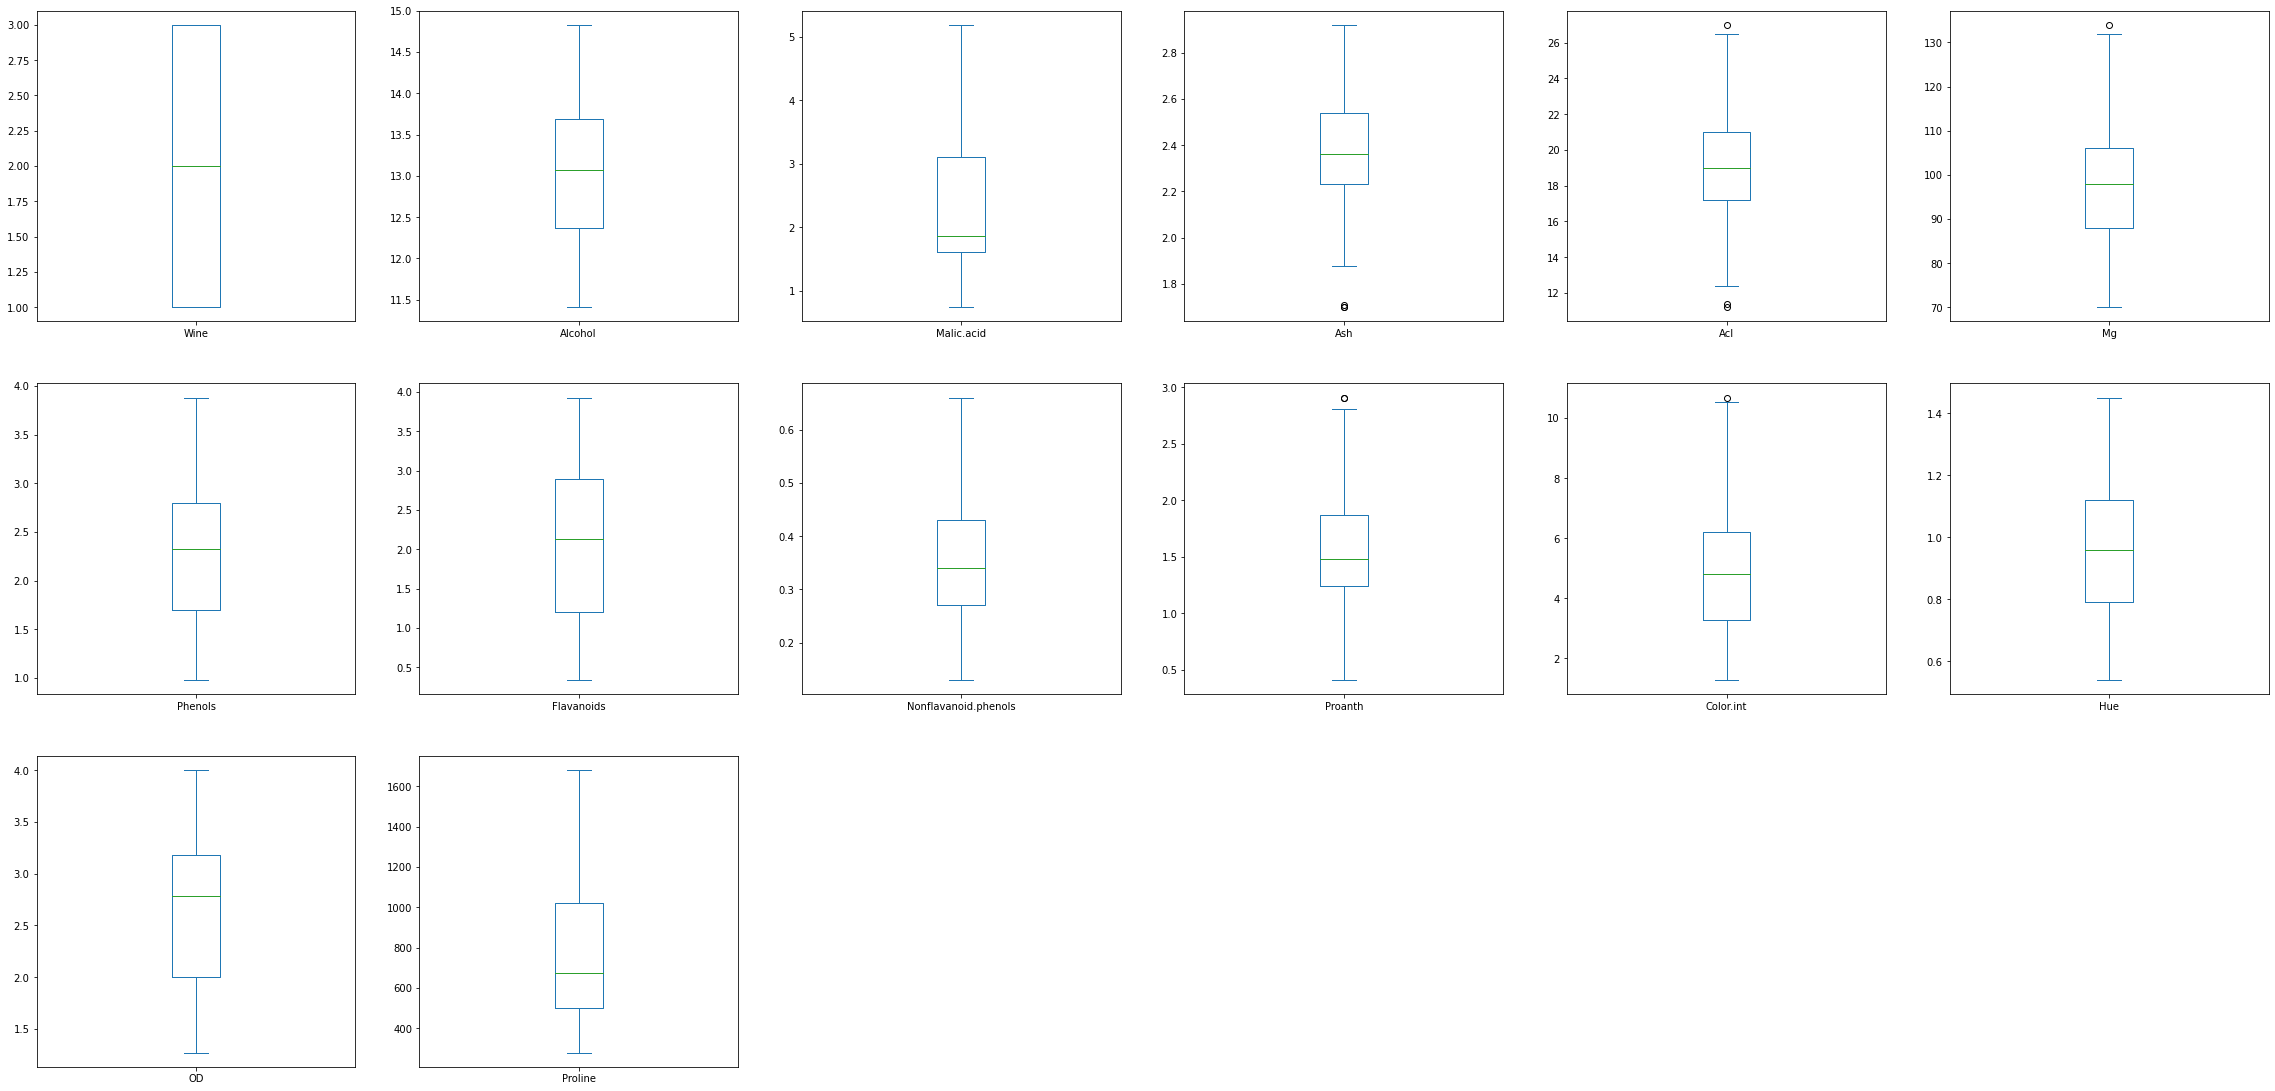

In [20]:
#CHECKING
wine.plot(kind='box',subplots=True,figsize=(40,40),layout=(6,6))
plt.show()

STANDARDIZATION since we are building KNN model

In [21]:
x=wine.iloc[:,1:]
y=wine.iloc[:,0]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((128, 13), (33, 13), (128,), (33,))

In [23]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# 5.Model Building

5.1 Method 1

In [24]:
np.sqrt(128)

11.313708498984761

In [54]:
knn=KNeighborsClassifier(n_neighbors=10)

In [55]:
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [56]:
y_predict=knn.predict(x_test)
y_predict

array([2, 2, 3, 1, 2, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 1, 3, 3, 2, 1, 2, 1,
       1, 1, 1, 3, 2, 1, 3, 2, 3, 2, 2], dtype=int64)

In [87]:
y_test-y_predict

113    0
117    0
156    0
57     0
101    0
31     0
108    0
53     0
107    0
157    0
20     0
90     0
16     0
70     0
26     0
32     0
141    0
164    0
105    0
17     0
81     0
19     0
12     0
9      0
33     0
168    0
104    0
58     0
145    0
112    0
150    0
84     0
63     0
Name: Wine, dtype: int64

# 6. Model Evaluation

In [59]:
print('accuracy_score',accuracy_score(y_test,y_predict))

accuracy_score 1.0


In [60]:
confusion_matrix(y_predict,y_test)

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

In [61]:
wine['Wine'].value_counts()

2    61
1    57
3    43
Name: Wine, dtype: int64

Good to take wighted as average for imbalance data set


In [62]:
precision_score(y_predict,y_test,average='weighted')

1.0

In [63]:
recall_score(y_predict,y_test,average='weighted')

1.0

In [64]:
f1_score(y_predict,y_test,average='weighted')

1.0

In [65]:
def wine_class():
    alcohol=float(input())
    malic=float(input())
    ash=float(input())
    Acl=float(input())
    Mg=float(input())
    Phenols=float(input())
    Flavonoids=float(input())
    non_flavonoids=float(input())
    proanth=float(input())
    Color_int=float(input())
    Hue=float(input())
    OD=float(input())
    Proline=float(input())
    array=np.array([alcohol,malic,ash,Acl,Mg,Phenols,Flavonoids,non_flavonoids,proanth,Color_int,Hue,OD,Proline]).reshape(1,13)
    predicted_class=knn.predict(array)
    print(predicted_class)

In [88]:
wine.sample(4)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
56,1,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342


In [89]:
knn.predict(wine.iloc[56,1:].values.reshape(1,13))

array([1], dtype=int64)

In [90]:
wine_class()

14.22
1.70
2.30
16.30
118
3.20
3
0.26
2.03
6.38
0.94
3.31
970
[1]


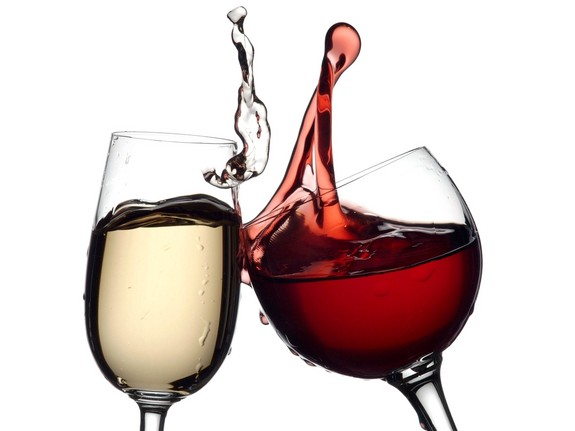

# THANK YOU!!!